In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/natashabenson/Documents/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files//marketing_customer_analysis.csv",index_col=0)

In [3]:
display(data.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# 1 Data Frame Shape
data.shape

(10910, 25)

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [6]:
# 2 Standardize header names

col_1 = [] #List to store new column names 
for i in range(len(data.columns)):
    col_1.append(data.columns[i].lower()) #Append adds items to the list in lower case
data.columns = col_1 #Assign new list as new column names
data.columns = data.columns.str.replace(" ","_") #Replace blank spaces
data.head() #Check column names

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
# 3 #Numerical columns
data._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [8]:
# 4 Categorical columns 
data.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [9]:
# 5 Check and deal with NaN values
display(data.isna().sum())

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df

,0
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [11]:
print(data['state'].unique())
print(data['response'].unique())
print(data['months_since_last_claim'].unique())
print(data['number_of_open_complaints'].unique())
print(data['vehicle_class'].unique())
print(data['vehicle_size'].unique())
print(data['vehicle_type'].unique())


['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']
['No' 'Yes' nan]
[ 7.  3. 34. 10. nan  2.  8. 35. 33. 19. 13.  5. 24. 25.  6. 20. 26. 14.
  9. 29. 11.  1. 18. 16. 30. 12.  4. 22. 31. 21. 28. 17. 15. 32. 23. 27.
  0.]
[ 0. nan  3.  1.  2.  4.  5.]
['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' nan]
['Medsize' 'Small' 'Large' nan]
[nan 'A']


In [12]:
mean_months_since_last_claim = data['months_since_last_claim'].mean()
print(mean_months_since_last_claim)
median_months_since_last_claim = data['months_since_last_claim'].median()
print(median_months_since_last_claim)


15.149070740488469
14.0


In [13]:
mean_number_of_open_complaints = data['number_of_open_complaints'].mean()
print(mean_number_of_open_complaints)
median_number_of_open_complaints = data['number_of_open_complaints'].median()
print(median_number_of_open_complaints)

0.38425610586747105
0.0


In [14]:
# State has 631 null values -> Change to a new value of other
# Response has 631 null values -> Change to No assuming there is no response
# Months since last claim has 633 null values -> Change to median.
# Number of open claims has 633 null values -> Change to median. 
# Vehicle class has 622 null values -> Drop as can't estimate the class of vehicle -maybe use mode?
# Vehicle size has 622 null values -> Drop as can't estimate the size of vehicle -maybe use mode?
# Vehicle type has 5482 null values -> Change to other 'B type' as 50% of data is unknown therefore do not want to drop


In [15]:
#Changing unknown states to other
data['state']=data['state'].fillna('Other')

In [16]:
#Changing response null values to No
data['response']=data['response'].fillna('No')

In [17]:
#Changing months since last claim to 0
data['months_since_last_claim']=data['months_since_last_claim'].fillna(median_months_since_last_claim)

In [18]:
#Changing number of open claims to 0
data['number_of_open_complaints']=data['number_of_open_complaints'].fillna(median_number_of_open_complaints)

In [19]:
#Drop null values in vehicle class
data = data[data['vehicle_class'].isna()==False]

In [20]:
#Drop null values in vehicle size
data = data[data['vehicle_size'].isna()==False]

In [21]:
# Change null values in vehicle type to B
data['vehicle_type']=data['vehicle_type'].fillna('B')

In [22]:
#Check data frame for null values
display(data.isna().sum())
display(data.head())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B


In [23]:
# 6 Datetime format- Extract months from the dataset and store in a separate column
import time
from datetime import date
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['months'] = data['effective_to_date'].dt.month
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


In [24]:
# Filter data to show info for first quarter
filtered = data[((data['months']==1) | (data['months']== 2)) | (data['months'] == "3") ]

In [25]:
filtered.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


In [26]:
# End of Lab Round 2 Analysis
# Lab Analysis Round 3

In [27]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10288 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10288 non-null  object        
 1   state                          10288 non-null  object        
 2   customer_lifetime_value        10288 non-null  float64       
 3   response                       10288 non-null  object        
 4   coverage                       10288 non-null  object        
 5   education                      10288 non-null  object        
 6   effective_to_date              10288 non-null  datetime64[ns]
 7   employmentstatus               10288 non-null  object        
 8   gender                         10288 non-null  object        
 9   income                         10288 non-null  int64         
 10  location_code                  10288 non-null  object        
 11  marital_status 

In [28]:
#Describe DataFrame.
data.describe()
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


No     8908
Yes    1380
Name: response, dtype: int64


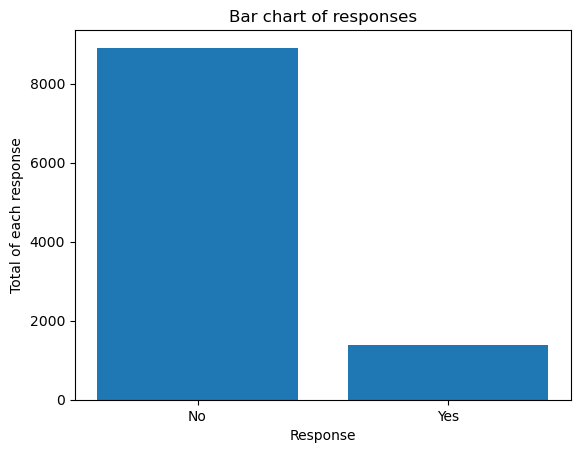

In [63]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
%matplotlib inline
print(data['response'].value_counts())
y=[sum(data['response'].isin(['No'])),sum(data['response'].isin(['Yes']))]
x=['No','Yes']
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_xlabel('Response')
ax.set_ylabel('Total of each response')
ax.set_title('Bar chart of responses')
plt.show()



Agent          3903
Branch         2847
Call Center    2017
Web            1521
Name: sales_channel, dtype: int64
['Agent', 'Call Center', 'Branch', 'Web']
[17.960543171919035, 10.783280646294346, 10.064452156668318, 11.11111111111111]


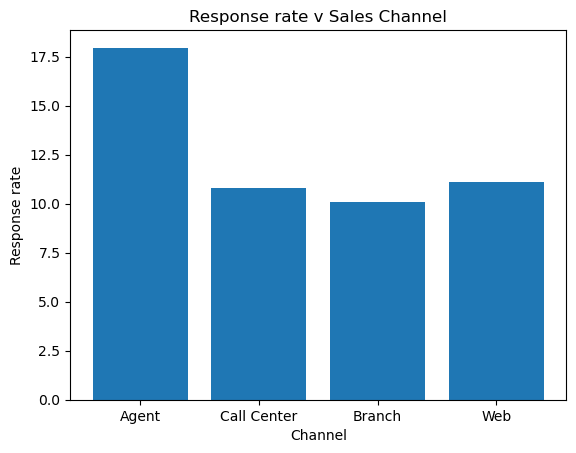

In [30]:
#Show a plot of the response rate by the sales channel.
#This is what I did over the weekend but it has now been clarified that we should just use total no. of responses. 
print(data['sales_channel'].value_counts())
channel=list(data['sales_channel'].unique())
print(channel)
#Response rate = number of yes/ total no. of responses 
agent = sum(data['sales_channel'].isin(['Agent'])& data['response'].isin(['Yes']) )
branch = sum(data['sales_channel'].isin(['Branch'])& data['response'].isin(['Yes']) )
call = sum(data['sales_channel'].isin(['Call Center'])& data['response'].isin(['Yes']) )
web = sum(data['sales_channel'].isin(['Web'])& data['response'].isin(['Yes']) )
channel_response_rate=[(agent/sum(data['sales_channel'].isin(['Agent'])))*100, 
               (branch/sum(data['sales_channel'].isin(['Branch']))*100), 
                (call/sum(data['sales_channel'].isin(['Call Center']))*100), 
                 (web/sum(data['sales_channel'].isin(['Web']))*100)]
                
print(channel_response_rate)

fig, ax = plt.subplots()
plt.bar(channel,channel_response_rate)
ax.set_xlabel('Channel')
ax.set_ylabel('Response rate')
ax.set_title('Response rate v Sales Channel')
plt.show()



Agent          3903
Branch         2847
Call Center    2017
Web            1521
Name: sales_channel, dtype: int64


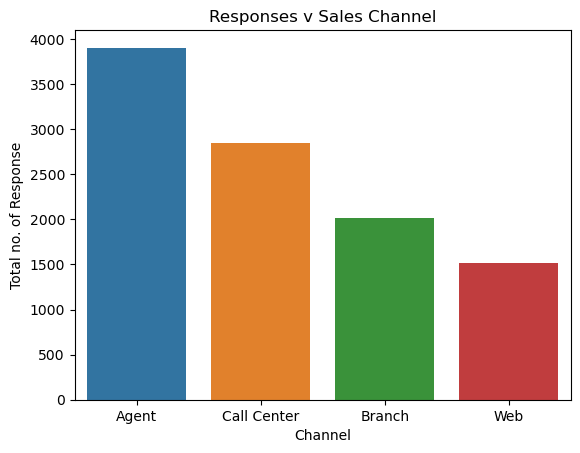

In [43]:
#Show a plot of the response rate by the sales channel using total no. of responses as response rate:
print(data['sales_channel'].value_counts())
fig, ax = plt.subplots() #Using to customise the axes/ titles
sns.barplot(x=channel, y=data['sales_channel'].value_counts())
ax.set_xlabel('Channel')
ax.set_ylabel('Total no. of Response')
ax.set_title('Responses v Sales Channel')
plt.show()

                                                               

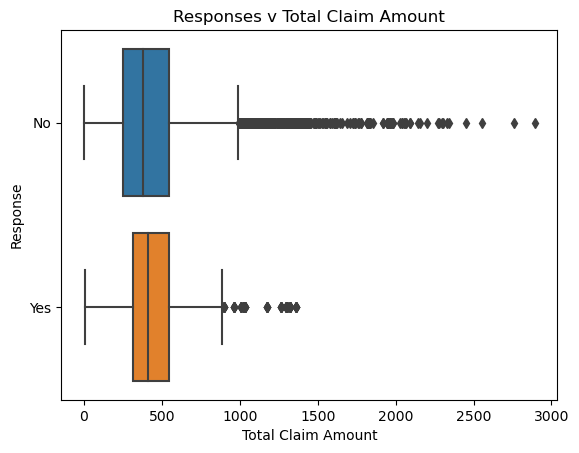

In [53]:
#Show a plot of the response rate by the total claim amount.
fig, ax = plt.subplots()
sns.boxplot(x = 'total_claim_amount',y='response', data=data)
ax.set_xlabel('Total Claim Amount')
ax.set_ylabel('Response')
ax.set_title('Responses v Total Claim Amount')
plt.show()


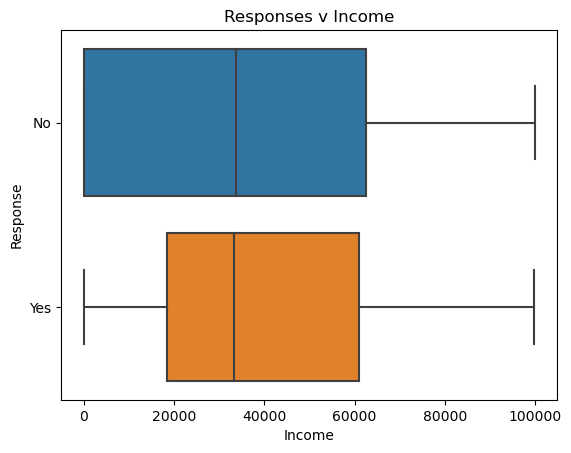

In [54]:
#Show a plot of the response rate by income.
fig, ax = plt.subplots()
sns.boxplot(x = 'income',y='response', data=data)
ax.set_xlabel('Income')
ax.set_ylabel('Response')
ax.set_title('Responses v Income')
plt.show()